In [10]:

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# 2. Upload and Extract Dataset
from google.colab import files
import zipfile, os

# Upload the Kaggle zip you downloaded (archive.zip)
uploaded = files.upload()

# Extract it
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("flood_dataset")

print("Files extracted:", os.listdir("flood_dataset"))

# 3. Load Dataset (correct file name: flood.csv)
df = pd.read_csv("flood_dataset/flood.csv")
print("Dataset Loaded Successfully ")

# Preview
df.head()


Saving archive.zip to archive (3).zip
Files extracted: ['flood.csv']
Dataset Loaded Successfully 


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [11]:
# 4. Data Exploration

# Info
print("\nDataset Info:")
df.info()

# Summary
print("\nStatistical Summary:")
display(df.describe())

# Missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Shape
print("\nDataset Shape:", df.shape)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  Coa

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000



Missing Values in Each Column:
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

Dataset Shape: (50000, 21)


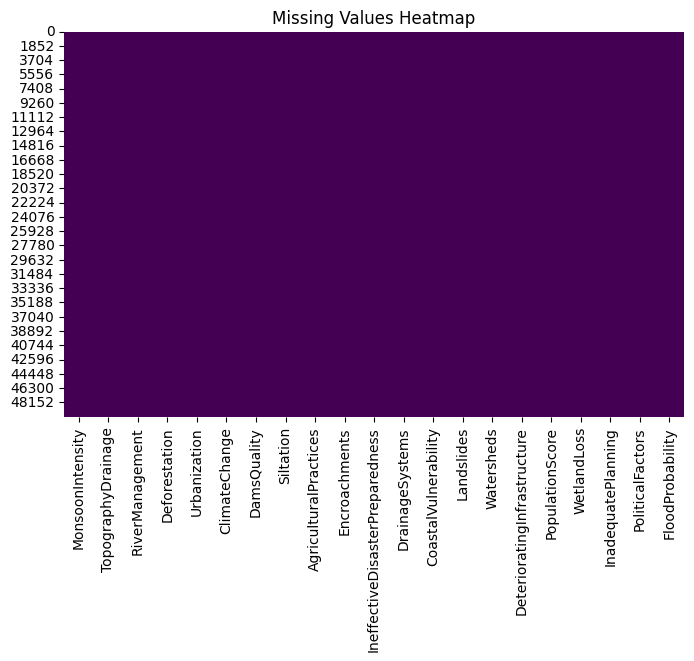

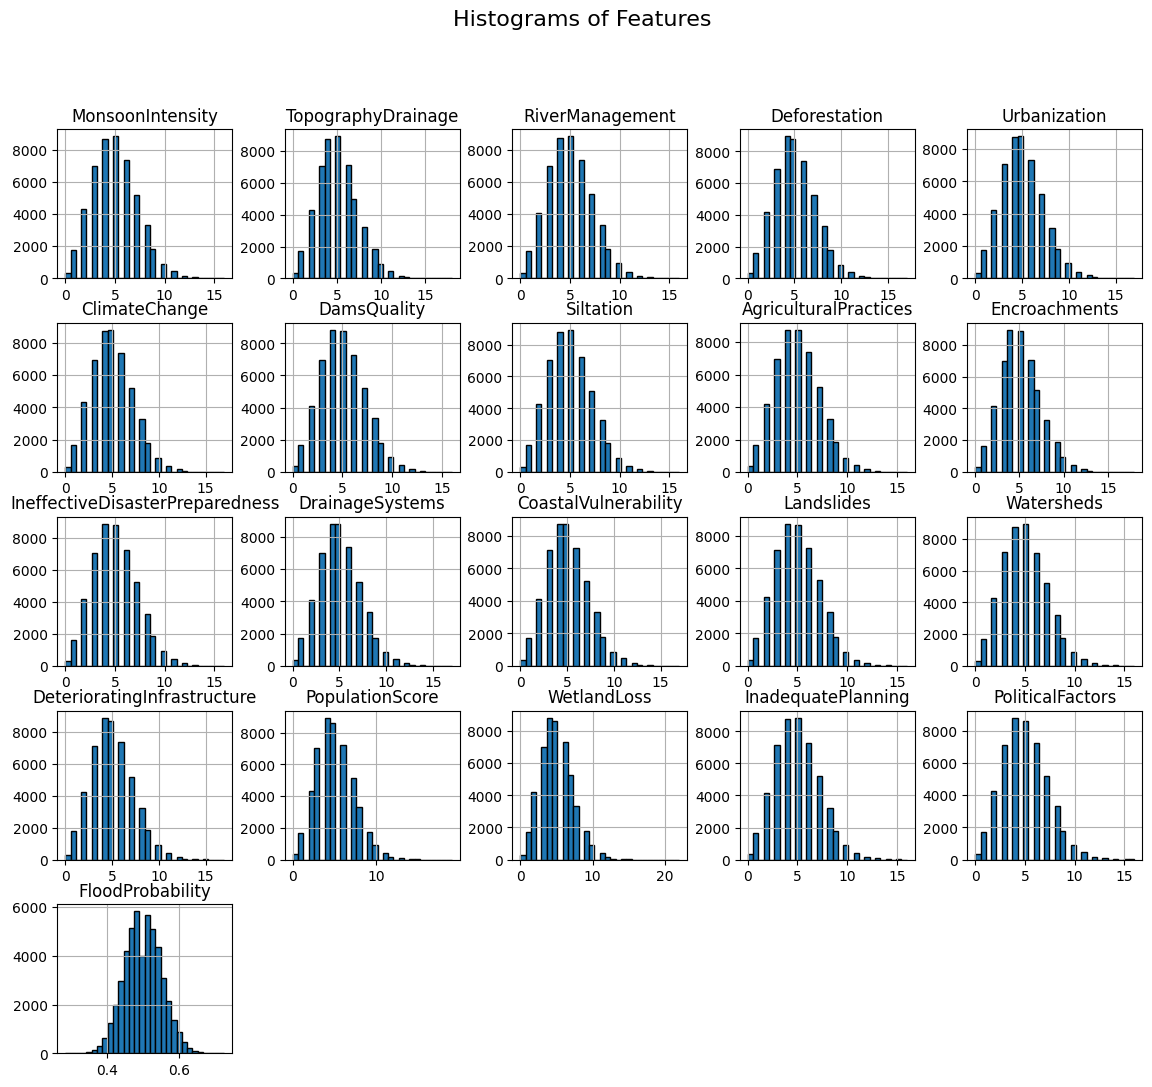

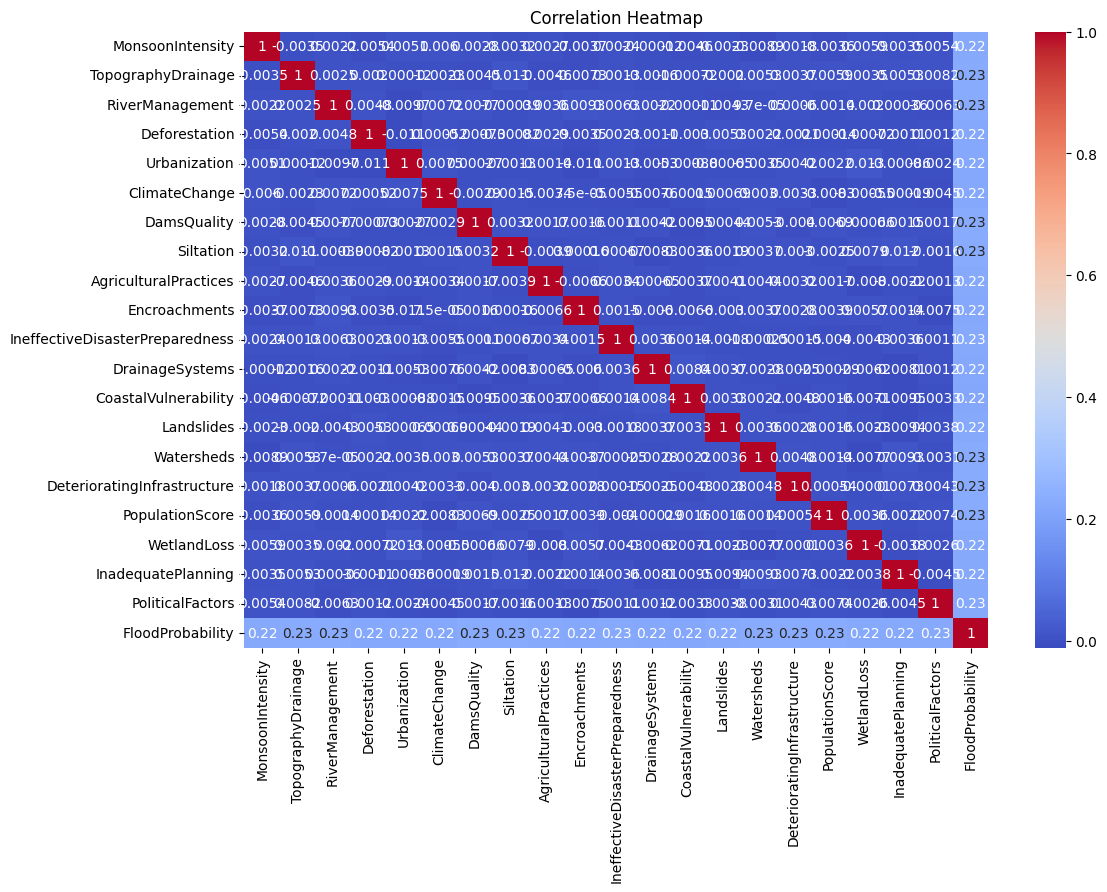

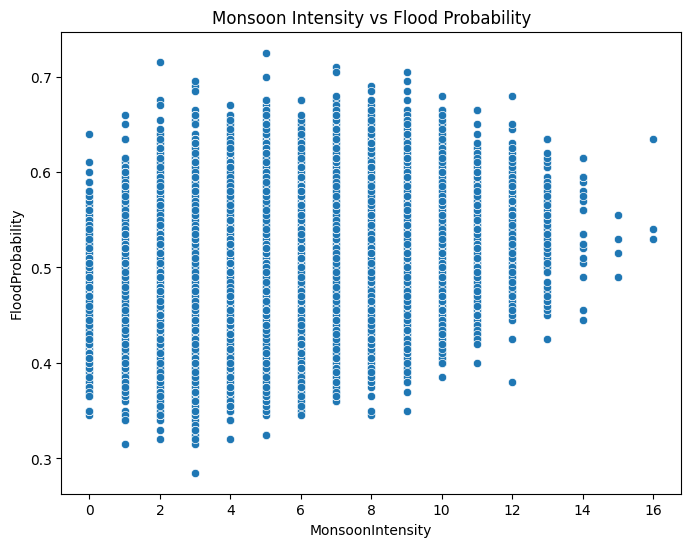

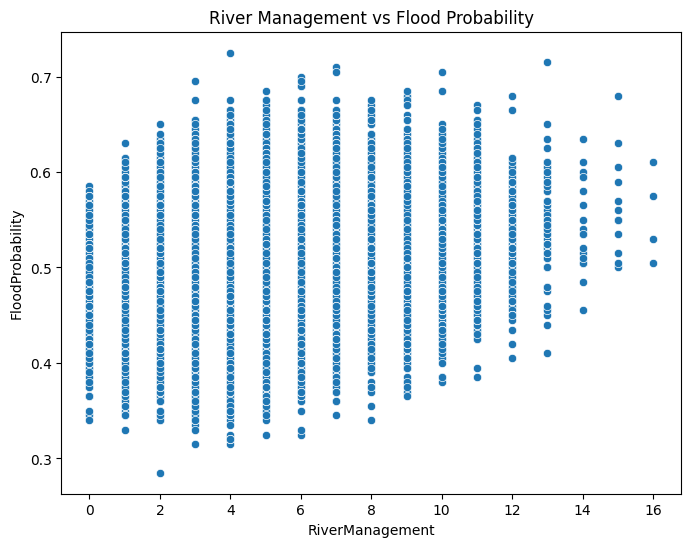

In [12]:
# 5. Exploratory Data Analysis (EDA)

# Missing values heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# Histograms
df.hist(figsize=(14,12), bins=30, edgecolor="black")
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Example scatterplots
if "MonsoonIntensity" in df.columns and "FloodProbability" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="MonsoonIntensity", y="FloodProbability", data=df)
    plt.title("Monsoon Intensity vs Flood Probability")
    plt.show()

if "RiverManagement" in df.columns and "FloodProbability" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="RiverManagement", y="FloodProbability", data=df)
    plt.title("River Management vs Flood Probability")
    plt.show()


In [13]:
# 6. Data Transformation

# Handle missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Encode categorical columns
categorical_cols = df.select_dtypes(include="object").columns
if len(categorical_cols) > 0:
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

# Scale numerical columns (except target)
numeric_cols = df.select_dtypes(include=np.number).columns.drop("FloodProbability")
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nTransformed Dataset (first 5 rows):")
display(df.head())



Transformed Dataset (first 5 rows):


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,-0.890321,1.342509,0.441028,0.446084,-0.440927,-0.443851,0.438597,-1.338607,-0.897767,-1.341169,...,2.231345,0.890080,-0.441806,-1.334944,-0.891125,-0.440066,-0.898457,-1.342769,0.449446,0.450
1,1.345004,-0.438066,-0.007144,0.895983,0.896486,1.801586,-1.788597,0.005106,-0.002739,-0.448954,...,1.784535,-1.335031,0.455973,-1.334944,-1.787539,-1.780394,1.790031,-1.791202,-0.886231,0.475
2,-0.890321,2.232796,-0.455316,-1.803411,0.896486,0.005236,-0.452281,0.900915,-0.450253,1.781585,...,0.890914,-0.444987,-0.441806,1.353026,0.453496,-1.780394,1.341950,-0.894336,0.449446,0.515
3,-0.443256,-0.438066,-1.351659,0.895983,-0.886732,-0.443851,-1.788597,-0.442798,0.444776,-0.448954,...,-0.449518,-1.335031,0.455973,0.457036,1.349910,1.347039,0.445787,0.450962,2.230349,0.520
4,-0.890321,0.897365,-0.007144,-1.353512,0.004877,1.352498,-0.006842,-1.338607,0.892290,-0.002846,...,0.890914,0.445058,0.007083,-0.886949,-0.891125,-0.440066,-0.450375,-0.894336,-0.441005,0.475


In [14]:
# 7. Feature Selection

X = df.drop("FloodProbability", axis=1)
y = df["FloodProbability"]

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features.tolist())



Selected Features: ['TopographyDrainage', 'RiverManagement', 'Siltation', 'Watersheds', 'DeterioratingInfrastructure']
